In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dc6bc5dc-fbb4-425a-8c0d-d5571907e195',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-28T10:51:17.061Z', 'error_code': 0, 'error_message': None, 'elapsed': 47, 'credit_count': 1, 'notice': None, 'total_count': 10128}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11163, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11163,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971808e+07,1.971808e+07,False,NaN,1,NaN,NaN,None,2024-06-28T10:50:00.000Z,61449.725523,2.206002e+10,1.9116,0.010701,0.545126,-3.810533,-9.417403,-1.524991,-12.244824,1.211670e+12,53.0283,1.290444e+12,None,2024-06-28T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:05:43.250172
1,1027,Ethereum,ETH,ethereum,9106,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201828e+08,1.201828e+08,True,NaN,2,NaN,NaN,None,2024-06-28T10:49:00.000Z,3442.963850,1.204882e+10,3.7967,0.238407,1.408567,-1.535399,-9.735518,8.334452,-2.290303,4.137850e+11,18.1071,4.137850e+11,None,2024-06-28T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:05:43.250172
2,825,Tether USDt,USDT,tether,90345,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127808e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-06-28T10:49:00.000Z,0.998704,4.636585e+10,7.1205,-0.014781,-0.030195,-0.060444,-0.041145,-0.124707,-0.167592,1.126346e+11,4.9289,1.159264e+11,None,2024-06-28T10:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-28 18:05:43.250172
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475833e+08,1.475833e+08,False,NaN,4,NaN,NaN,None,2024-06-28T10:49:00.000Z,577.149909,1.655718e+09,5.5509,0.238833,0.889409,-1.293440,-3.686388,-1.615276,-4.284089,8.517771e+10,3.7274,8.517771e+10,None,2024-06-28T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:05:43.250172
4,5426,Solana,SOL,solana,694,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.623494e+08,5.790753e+08,True,NaN,5,NaN,NaN,None,2024-06-28T10:49:00.000Z,145.066747,3.107439e+09,108.5621,-0.158339,4.700143,9.774033,-14.361686,7.407901,-25.926478,6.707152e+10,2.9351,8.400456e+10,None,2024-06-28T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:05:43.250172
5,3408,USDC,USDC,usd-coin,20428,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.263266e+10,3.263266e+10,False,NaN,6,NaN,NaN,None,2024-06-28T10:49:00.000Z,0.999900,5.251872e+09,5.7561,-0.001350,0.009033,-0.007139,-0.013692,-0.014748,-0.003232,3.262941e+10,1.4279,3.262941e+10,None,2024-06-28T10:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-28 18:05:43.250172
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-06-28T10:50:00.000Z,0.479424,8.754836e+08,2.8170,0.610467,2.337511,-2.462385,-9.690983,-5.373197,-23.294098,2.669833e+10,1.1683,4.794241e+10,None,2024-06-28T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:05:43.250172
7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.459643e+09,5.108198e+09,True,NaN,8,3.414167e+09,2.623399e+10,None,2024-06-28T10:49:00.000Z,7.683862,2.500446e+08,6.8522,0.257043,0.041713,8.322233,17.966455,46.575656,46.962174,1.889956e+10,0.8270,3.925069e+10,None,2024-06-28T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:05:43.250172
8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",Na

In [33]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'dc6bc5dc-fbb4-425a-8c0d-d5571907e195',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

In [34]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(5) #sleep for 5 seconds
exit()

API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [42]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11163,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19718075.000000,19718075.000000,False,NaN,1,NaN,NaN,None,2024-06-28T11:06:00.000Z,61432.995289,22007707330.757874,2.076000,-0.006664,0.535750,-3.894392,-9.431782,-1.544723,-12.393633,1211340408577.319092,53.025600,1290092901062.790039,None,2024-06-28T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:08:38.293029
1,1027,Ethereum,ETH,ethereum,9106,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120182780.714361,120182780.714361,True,NaN,2,NaN,NaN,None,2024-06-28T11:06:00.000Z,3440.876112,12019952505.274317,3.481600,0.144213,1.353667,-1.725745,-9.788747,8.345161,-2.628382,413534059191.389893,18.097000,413534059191.390015,None,2024-06-28T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:08:38.293029
2,825,Tether USDt,USDT,tether,90345,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112780783337.505203,116076856624.972961,True,NaN,3,NaN,NaN,None,2024-06-28T11:06:00.000Z,0.998750,46249085214.532097,6.923100,0.004085,-0.021728,-0.056541,-0.028351,-0.108726,-0.160539,112639816817.627197,4.929300,115931770289.940002,None,2024-06-28T11:06:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-28 18:08:38.293029
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583333.948601,147583333.948601,False,NaN,4,NaN,NaN,None,2024-06-28T11:06:00.000Z,576.656286,1643973033.271207,4.449400,0.079735,0.703077,-1.520290,-3.816415,-1.786715,-4.605449,85104857163.233475,3.724400,85104857163.229996,None,2024-06-28T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:08:38.293029
4,5426,Solana,SOL,solana,694,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462349295.079410,579075190.127984,True,NaN,5,NaN,NaN,None,2024-06-28T11:06:00.000Z,145.136517,3096471918.177625,108.313500,-0.300322,4.702703,9.807533,-14.384976,7.285611,-26.080329,67103766294.284340,2.937400,84044956137.529999,None,2024-06-28T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:08:38.293029


In [39]:
pd.set_option('display.float_format', lambda x:'%5f'% x)

In [41]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11163,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19718075.000000,19718075.000000,False,NaN,1,NaN,NaN,None,2024-06-28T11:06:00.000Z,61432.995289,22007707330.757874,2.076000,-0.006664,0.535750,-3.894392,-9.431782,-1.544723,-12.393633,1211340408577.319092,53.025600,1290092901062.790039,None,2024-06-28T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:08:38.293029
1,1027,Ethereum,ETH,ethereum,9106,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120182780.714361,120182780.714361,True,NaN,2,NaN,NaN,None,2024-06-28T11:06:00.000Z,3440.876112,12019952505.274317,3.481600,0.144213,1.353667,-1.725745,-9.788747,8.345161,-2.628382,413534059191.389893,18.097000,413534059191.390015,None,2024-06-28T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:08:38.293029
2,825,Tether USDt,USDT,tether,90345,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112780783337.505203,116076856624.972961,True,NaN,3,NaN,NaN,None,2024-06-28T11:06:00.000Z,0.998750,46249085214.532097,6.923100,0.004085,-0.021728,-0.056541,-0.028351,-0.108726,-0.160539,112639816817.627197,4.929300,115931770289.940002,None,2024-06-28T11:06:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-28 18:08:38.293029
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583333.948601,147583333.948601,False,NaN,4,NaN,NaN,None,2024-06-28T11:06:00.000Z,576.656286,1643973033.271207,4.449400,0.079735,0.703077,-1.520290,-3.816415,-1.786715,-4.605449,85104857163.233475,3.724400,85104857163.229996,None,2024-06-28T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:08:38.293029
4,5426,Solana,SOL,solana,694,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462349295.079410,579075190.127984,True,NaN,5,NaN,NaN,None,2024-06-28T11:06:00.000Z,145.136517,3096471918.177625,108.313500,-0.300322,4.702703,9.807533,-14.384976,7.285611,-26.080329,67103766294.284340,2.937400,84044956137.529999,None,2024-06-28T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 18:08:38.293029


In [44]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.004034,0.522152,-3.965099,-9.384752,-1.529348,-12.406606
Ethereum,0.080834,1.316009,-1.842793,-9.841780,8.300472,-2.604293
Tether USDt,-0.000623,-0.015128,-0.064295,-0.042792,-0.109411,-0.169389
BNB,0.027340,0.642225,-1.618883,-3.828310,-1.815706,-4.703317
Solana,-0.219090,4.515232,9.542769,-14.393655,7.226680,-26.202619
USDC,0.001620,0.010164,-0.013116,-0.032481,-0.008469,-0.013553
XRP,0.537300,1.871486,-2.470693,-9.523610,-5.702280,-23.464612
Toncoin,0.208624,-0.222051,8.058450,17.883101,46.004035,45.839107
Dogecoin,-0.055757,3.555110,1.736990,-23.374425,-10.383051,-39.885529


In [85]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.004034
             quote.USD.percent_change_24h     0.522152
             quote.USD.percent_change_7d     -3.965099
             quote.USD.percent_change_30d    -9.384752
             quote.USD.percent_change_60d    -1.529348
             quote.USD.percent_change_90d   -12.406606
Ethereum     quote.USD.percent_change_1h      0.080834
             quote.USD.percent_change_24h     1.316009
             quote.USD.percent_change_7d     -1.842793
             quote.USD.percent_change_30d    -9.841780
             quote.USD.percent_change_60d     8.300472
             quote.USD.percent_change_90d    -2.604293
Tether USDt  quote.USD.percent_change_1h     -0.000623
             quote.USD.percent_change_24h    -0.015128
             quote.USD.percent_change_7d     -0.064295
             quote.USD.percent_change_30d    -0.042792
             quote.USD.percent_change_60d    -0.109411
             quote.USD.

In [86]:
type(df4)

pandas.core.series.Series

In [87]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.004034
            quote.USD.percent_change_24h   0.522152
            quote.USD.percent_change_7d   -3.965099
            quote.USD.percent_change_30d  -9.384752
            quote.USD.percent_change_60d  -1.529348
            quote.USD.percent_change_90d -12.406606
Ethereum    quote.USD.percent_change_1h    0.080834
            quote.USD.percent_change_24h   1.316009
            quote.USD.percent_change_7d   -1.842793
            quote.USD.percent_change_30d  -9.841780
            quote.USD.percent_change_60d   8.300472
            quote.USD.percent_change_90d  -2.604293
Tether USDt quote.USD.percent_change_1h   -0.000623
            quote.USD.percent_change_24h  -0.015128
            quote.USD.percent_change_7d   -0.064295
            quote.USD.percent_change_30d  -0.042792
            quote.USD.percent_change_60d  -0.109411
            quote.USD.percent_change_90d  -0.169389
BNB         quote.USD.percent_change_1h    0.027340
            quote.USD.percent_change_24h   0.642225
            quote.USD.percent_change_7d   -1.618883
            quote.USD.percent_change_30d  -3.828310
            quote.USD.percent_change_60d  -1.815706
            quote.USD.percent_change_90d  -4.703317
Solana      quote.USD.percent_change_1h   -0.219090
            quote.USD.percent_change_24h   4.515232
            quote.USD.percent_change_7d    9.542769
            quote.USD.percent_change_30d -14.393655
            quote.USD.percent_change_60d   7.226680
            quote.USD.percent_change_90d -26.202619
USDC        quote.USD.percent_change_1h    0.001620
            quote.USD.percent_change_24h   0.010164
            quote.USD.percent_change_7d   -0.013116
            quote.USD.percent_change_30d  -0.032481
            quote.USD.percent_change_60d  -0.008469
            quote.USD.percent_change_90d  -0.013553
XRP         quote.USD.percent_change_1h    0.537300
            quote.USD.percent_change_24h   1.871486
            quote.USD.percent_change_7d   -2.470693
            quote.USD.percent_change_30d  -9.523610
            quote.USD.percent_change_60d  -5.702280
            quote.USD.percent_change_90d -23.464612
Toncoin     quote.USD.percent_change_1h    0.208624
            quote.USD.percent_change_24h  -0.222051
            quote.USD.percent_change_7d    8.058450
            quote.USD.percent_change_30d  17.883101
            quote.USD.percent_change_60d  46.004035
            quote.USD.percent_change_90d  45.839107
Dogecoin    quote.USD.percent_change_1h   -0.055757
            quote.USD.percent_change_24h   3.555110
            quote.USD.percent_change_7d    1.736990
            quote.USD.percent_change_30d -23.374425
            quote.USD.percent_change_60d -10.383051
            quote.USD.percent_change_90d -39.885529
Cardano     quote.USD.percent_change_1h    0.483454
            quote.USD.percent_change_24h   2.565032
            quote.USD.percent_change_7d    1.025942
            quote.USD.percent_change_30d -15.882339
            quote.USD.percent_change_60d -14.433667
            quote.USD.percent_change_90d -40.607999
Avalanche   quote.USD.percent_change_1h    0.676716
            quote.USD.percent_change_24h   7.017495
            quote.USD.percent_change_7d    2.279118
            quote.USD.percent_change_30d -23.145503
            quote.USD.percent_change_60d -14.533334
            quote.USD.percent_change_90d -47.482461
TRON        quote.USD.percent_change_1h    0.019734
            quote.USD.percent_change_24h  -0.444277
            quote.USD.percent_change_7d    4.261811
            quote.USD.percent_change_30d   9.473121
            quote.USD.percent_change_60d   2.839490
            quote.USD.percent_change_90d   1.436994
Shiba Inu   quote.USD.percent_change_1h   -0.150786
            quote.USD.percent_change_24h   1.218960
            quote.USD.percent_change_7d   -3.820682
            quote.USD.percent_change_30d 

In [89]:
df5.count()

values    90
dtype: int64

In [93]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.004034
1,Bitcoin,quote.USD.percent_change_24h,0.522152
2,Bitcoin,quote.USD.percent_change_7d,-3.965099
3,Bitcoin,quote.USD.percent_change_30d,-9.384752
4,Bitcoin,quote.USD.percent_change_60d,-1.529348
5,Bitcoin,quote.USD.percent_change_90d,-12.406606
6,Ethereum,quote.USD.percent_change_1h,0.080834
7,Ethereum,quote.USD.percent_change_24h,1.316009
8,Ethereum,quote.USD.percent_change_7d,-1.842793
9,Ethereum,quote.USD.percent_change_30d,-9.841780


In [121]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.004034
1,Bitcoin,quote.USD.percent_change_24h,0.522152
2,Bitcoin,quote.USD.percent_change_7d,-3.965099
3,Bitcoin,quote.USD.percent_change_30d,-9.384752
4,Bitcoin,quote.USD.percent_change_60d,-1.529348
5,Bitcoin,quote.USD.percent_change_90d,-12.406606
6,Ethereum,quote.USD.percent_change_1h,0.080834
7,Ethereum,quote.USD.percent_change_24h,1.316009
8,Ethereum,quote.USD.percent_change_7d,-1.842793
9,Ethereum,quote.USD.percent_change_30d,-9.841780


In [131]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h',
'quote.USD.percent_change_24h',
'quote.USD.percent_change_7d',
'quote.USD.percent_change_30d',
'quote.USD.percent_change_60d',
'quote.USD.percent_change_90d'],
['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.004034
1,Bitcoin,24h,0.522152
2,Bitcoin,7d,-3.965099
3,Bitcoin,30d,-9.384752
4,Bitcoin,60d,-1.529348
5,Bitcoin,90d,-12.406606
6,Ethereum,1h,0.080834
7,Ethereum,24h,1.316009
8,Ethereum,7d,-1.842793
9,Ethereum,30d,-9.841780


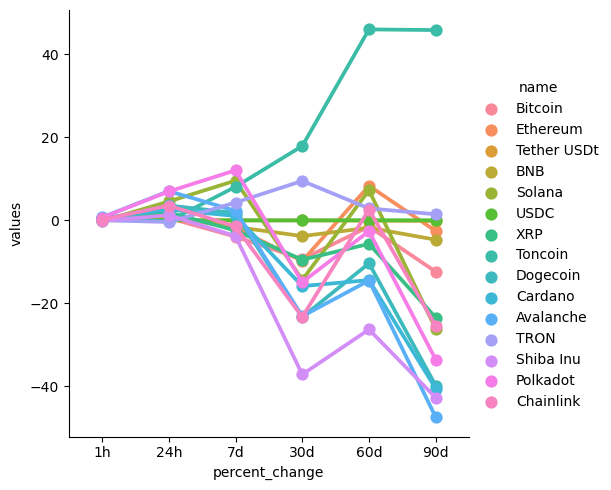

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change',y='values',hue='name',data=df7, kind ='point')

In [141]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,61432.995289,2024-06-28 18:08:38.293029
0,Bitcoin,61432.995289,2024-06-28 18:08:38.293029
0,Bitcoin,61437.766225,2024-06-28 18:13:13.804500
0,Bitcoin,61437.766225,2024-06-28 18:13:19.877581
0,Bitcoin,61437.766225,2024-06-28 18:13:28.518740
0,Bitcoin,61437.766225,2024-06-28 18:13:34.829344
